In [1]:
#Polynomial Regression
#simple regression model
#import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
#atlanta city dataset ,include only 24 inch bin package data 
df = pd.read_csv("Pumpkin price( 24 bins) atlanta .csv") #Reading the dataset (dataframe) 
df.head()#shows the top 5 rows

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,145.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,150.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [2]:
df.columns
#data dictionary

Index([u'Commodity Name', u'City Name', u'Type', u'Package', u'Variety',
       u'Sub Variety', u'Grade', u'Date', u'Low Price', u'High Price',
       u'Mostly Low', u'Mostly High', u'Origin', u'Origin District',
       u'Item Size', u'Color', u'Environment', u'Unit of Sale', u'Quality',
       u'Condition', u'Appearance', u'Storage', u'Crop', u'Repack',
       u'Trans Mode'],
      dtype='object')

In [3]:
#(drop all columns except low price,high price,size
df=df.iloc[:, [8,9,14]] 

In [4]:
df.head()

,Low Price,High Price,Item Size
0,140.0,154.75,jbo
1,145.0,154.75,xlge
2,150.0,154.75,med-lge
3,150.0,150.00,sml
4,140.0,154.75,jbo


In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0) #check missing value isnull() return 1 for missing value (no missing value)

Low Price     0
High Price    0
Item Size     0
dtype: int64

In [6]:
#assign number to classes
maps = {'sml': 0,'med': 1,'med-lge': 2,'lge': 3,'xlge': 4,'jbo': 5}
df = df.assign(size=df['Item Size'].map(maps))

In [7]:
df.head()

,Low Price,High Price,Item Size,size
0,140.0,154.75,jbo,5
1,145.0,154.75,xlge,4
2,150.0,154.75,med-lge,2
3,150.0,150.00,sml,0
4,140.0,154.75,jbo,5


In [8]:
#high price,low price ,size are in string , convert to int
df[['Low Price','High Price','size']] = df[['Low Price','High Price','size']].apply(pd.to_numeric)

In [9]:
df.describe()

,Low Price,High Price,size
count,42.000000,42.000000,42.000000
mean,141.880952,148.327381,1.928571
std,8.062870,8.124505,1.992582
min,123.500000,135.000000,0.000000
25%,140.000000,145.000000,0.000000
50%,142.500000,152.375000,1.500000
75%,150.000000,154.750000,4.000000
max,150.000000,154.750000,5.000000


In [10]:
#average prices
df= df.assign(price=(df['High Price'] + df['Low Price']) / 2)

In [11]:
df.head()

,Low Price,High Price,Item Size,size,price
0,140.0,154.75,jbo,5,147.375
1,145.0,154.75,xlge,4,149.875
2,150.0,154.75,med-lge,2,152.375
3,150.0,150.00,sml,0,150.000
4,140.0,154.75,jbo,5,147.375


In [12]:
Y_dataset=df.iloc[:, 4].values.reshape(-1,1) #price
X_dataset=df.iloc[:, 3].values.reshape(-1,1) #size
X_train, X_test, y_train, y_test = train_test_split(X_dataset,Y_dataset,test_size=0.1 , random_state= 0) #test size=0.1 -> 90% train and 10% test
#apply linear regression, result will be used as baseline 
simple_linear_regression=LinearRegression() #define 
simple_linear_regression.fit(X_dataset,Y_dataset) #fit model 
#check accuracy of model
score=simple_linear_regression.score(X_test, y_test)
print "Accuracy= ",(score*100),"%"

Accuracy=  27.487177527 %


In [13]:
Y_dataset=df.iloc[:, 4].values.reshape(-1,1) #price
X_dataset=df.iloc[:, 3].values.reshape(-1,1) #size
X_train, X_test, y_train, y_test = train_test_split(X_dataset,Y_dataset,test_size=0.1 , random_state= 0) #test size=0.1 -> 90% train and 10% test
#applying polynomial regression
#converting the matrix to include polynomial instances of the independent variable
poly_feature=PolynomialFeatures(degree=2)
X_poly_train=poly_feature.fit_transform(X_train)
X_poly_test=poly_feature.fit_transform(X_test) 
#applying polynomial regression model
polynomial_regression=LinearRegression() #define 
polynomial_regression.fit(X_poly_train,y_train) #fit model 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#check accuracy of model
score=polynomial_regression.score(X_poly_test, y_test)
print "Accuracy= ",(score*100),"%"

Accuracy=  77.8308311881 %


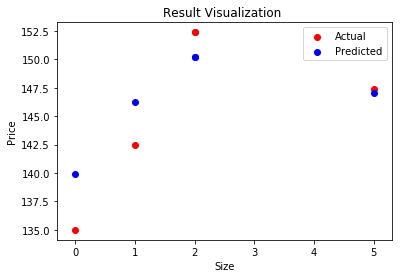

In [16]:
#visualization 
#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'red',label='Actual')
plt.title ("Result Visualization ")
plt.scatter(X_test,polynomial_regression.predict(X_poly_test),color= 'blue',label='Predicted')
plt.xlabel("Size")
plt.ylabel("Price")
plt.legend(loc="bottom right")
plt.show()